
# **Taller Analisis de datos 1**

Importe de librerias

In [ ]:
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Se carga el dataset de obras valle


In [ ]:
df_obras = pd.read_csv('sample_data/df_cruce_final.csv')


Analisis del dataset, total de registros, numero de nulos, tipos de variables

In [ ]:
df_obras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nivel_entidad                582 non-null    object 
 1   codigo_entidad_en_secop      582 non-null    int64  
 2   nombre_de_la_entidad         582 non-null    object 
 3   nit_de_la_entidad            582 non-null    int64  
 4   departamento_entidad         582 non-null    object 
 5   municipio_entidad            582 non-null    object 
 6   estado_del_proceso           582 non-null    object 
 7   modalidad_de_contrataci_n    582 non-null    object 
 8   objeto_a_contratar           582 non-null    object 
 9   objeto_del_proceso           582 non-null    object 
 10  tipo_de_contrato             582 non-null    object 
 11  id_contrato                  582 non-null    object 
 12  numero_de_proceso            582 non-null    object 
 13  valor_contrato      

Visualizacion de los primeros registros del dataset

In [ ]:
df_obras.head()

,nivel_entidad,codigo_entidad_en_secop,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,...,fecha_fin_ejecuci_n,valor_categoria,sector,meses_ejecucion,total_facturas,cantidad_facturas,valor_contrato_numeric,porcentaje,valor_contrato_formatted,bandera
0,Territorial,703576736,DIRECCION TERRITORIAL DEL MINISTERIO DEL TRABA...,805026609,Valle del Cauca,NO DEFINIDO,Activo,Mínima cuantía,Realizar mantenimiento correctivo y preventivo...,Realizar mantenimiento correctivo y preventivo...,...,2025-11-05,Bajo (0 - 1.000 millones),servicios públicos,NaN,0.0,2,26632085,0.000000,$26.632.085,0
1,Territorial,704247485,MUNICIPIO DE SEVILLA,800100527,Valle del Cauca,SEVILLA,Activo,Mínima cuantía,REALIZAR OBRAS DE MEJORAMIENTO Y ADECUACIÓN DE...,REALIZAR OBRAS DE MEJORAMIENTO Y ADECUACIÓN DE...,...,2025-07-29,Bajo (0 - 1.000 millones),seguridad,NaN,8385249.0,1,8385249,100.000000,$8.385.249,0
2,Territorial,704247519,ALCALDIA MUNICIPAL DE ANDALUCIA VALLE DEL CAUCA,891900443,Valle del Cauca,ANDALUCIA,En ejecución,Mínima cuantía,CONTRATAR POR EL SISTEMA DE PRECIOS UNITARIOS ...,CONTRATAR POR EL SISTEMA DE PRECIOS UNITARIOS ...,...,2022-12-30,Bajo (0 - 1.000 millones),educación,0.131406,27413429.0,1,27413429,100.000000,$27.413.429,0
3,Territorial,703714378,MUNICIPIO DE EL CERRITO.,800100533,Valle del Cauca,EL CERRITO,En ejecución,Mínima cuantía,REMODELACION ADECUACION Y MANTENIMIENTO DE LAS...,REMODELACION ADECUACION Y MANTENIMIENTO DE LAS...,...,2022-12-31,Bajo (0 - 1.000 millones),cultura,0.492773,22364300.0,1,22364300,100.000000,$22.364.300,0
4,Nacional,706011103,Rama Judicial  Dirección Seccional de Adminis...,805003838,Valle del Cauca,NO DEFINIDO,Modificado,Selección Abreviada de Menor Cuantía,CONTRATAR EN NOMBRE DE LA NACION - CONSEJO SUP...,CONTRATAR EN NOMBRE DE LA NACION - CONSEJO SUP...,...,2024-12-10,Medio (1.000 - 10.000 millones),mejoramiento,4.369251,633148010.0,1,1887698818,33.540732,$1.887.698.818,0


Con base en el conocimiento del negocio, se definió utilizar las siguientes columnas para el análisis, descartando aquellas como IDs, URLs, nombres de contrato, nombre de la entidad, entre otras, que no aportan valor en un análisis estadístico.

In [ ]:
# fitler relevant columns

all_columns = df_obras.columns.tolist()
relevant_columns = ['nivel_entidad',
 'municipio_entidad',
 'modalidad_de_contrataci_n',
 'valor_contrato',
 'fecha_de_firma_del_contrato',
 'fecha_inicio_ejecuci_n',
 'fecha_fin_ejecuci_n',
 'valor_categoria',
 'sector',
 'porcentaje',
 'bandera']

df_obras_filtered = df_obras[relevant_columns].copy()

In [ ]:
df_obras_filtered.head()

,nivel_entidad,municipio_entidad,modalidad_de_contrataci_n,valor_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecuci_n,fecha_fin_ejecuci_n,valor_categoria,sector,porcentaje,bandera
0,Territorial,NO DEFINIDO,Mínima cuantía,26632085,2025-08-29T00:00:00.000,NaN,2025-11-05,Bajo (0 - 1.000 millones),servicios públicos,0.000000,0
1,Territorial,SEVILLA,Mínima cuantía,8385249,2025-07-09T00:00:00.000,NaN,2025-07-29,Bajo (0 - 1.000 millones),seguridad,100.000000,0
2,Territorial,ANDALUCIA,Mínima cuantía,27413429,2022-12-26T00:00:00.000,2022-12-26,2022-12-30,Bajo (0 - 1.000 millones),educación,100.000000,0
3,Territorial,EL CERRITO,Mínima cuantía,22364300,2022-12-15T00:00:00.000,2022-12-16,2022-12-31,Bajo (0 - 1.000 millones),cultura,100.000000,0
4,Nacional,NO DEFINIDO,Selección Abreviada de Menor Cuantía,1887698818,2024-07-26T00:00:00.000,2024-07-30,2024-12-10,Medio (1.000 - 10.000 millones),mejoramiento,33.540732,0


1. El primer paso en la preparación de datos consiste en convertir las columnas de fecha a un formato reconocido por pandas, lo que permite manipularlas y analizarlas correctamente.


In [ ]:
# format object "2022-12-26T00:00:00.000" to date

df_obras_filtered['fecha_de_firma_del_contrato'] = pd.to_datetime(df_obras_filtered['fecha_de_firma_del_contrato'], format='%Y-%m-%dT%H:%M:%S.%f')

# format object "2022-12-26" to date

df_obras_filtered['fecha_inicio_ejec'] = pd.to_datetime(df_obras_filtered['fecha_inicio_ejecuci_n'], format='%Y-%m-%d')
df_obras_filtered.drop('fecha_inicio_ejecuci_n', axis=1, inplace=True)

# format fecha_fin_ejecuci_n to "2022-12-26"

df_obras_filtered['fecha_fin_ejec'] = pd.to_datetime(df_obras_filtered['fecha_fin_ejecuci_n'], format='%Y-%m-%d')
df_obras_filtered.drop('fecha_fin_ejecuci_n', axis=1, inplace=True)


2. Manejo de NULL de la variable "fecha_firma_contrato"

In [ ]:
# Segun criterio de negocio, la relacion entre fecha de inicio de ejecucion y fecha fin de ejecucion se mantienen en los contratos de categorias Bajo, y como la mayoria de null son de catagoria baja. Se filtra la categoria "Bajo (0 - 1.000 millones)"
df_obras_bajo = df_obras_filtered[df_obras_filtered['valor_categoria'] == 'Bajo (0 - 1.000 millones)'].copy()


# Se repite el proceso anterior parase reemplazar los valores NULL en la columna "fecha_de_firma_del_contrato", se calcula el promedio de la diferencia en dias entre la "fecha_de_firma_del_contrato" y "fecha_fin_ejec".
dias_prom_firma_Bajo = df_obras_bajo[df_obras_bajo['fecha_de_firma_del_contrato'].notnull()]['fecha_fin_ejec'].sub(df_obras_bajo[df_obras_bajo['fecha_de_firma_del_contrato'].notnull()]['fecha_de_firma_del_contrato']).mean()

df_obras_filtered.loc[df_obras_filtered['fecha_de_firma_del_contrato'].isnull(), 'fecha_de_firma_del_contrato'] = df_obras_filtered.loc[df_obras_filtered['fecha_de_firma_del_contrato'].isnull(), 'fecha_fin_ejec'] - dias_prom_firma_Bajo


df_obras_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   nivel_entidad                582 non-null    object        
 1   municipio_entidad            582 non-null    object        
 2   modalidad_de_contrataci_n    582 non-null    object        
 3   valor_contrato               582 non-null    int64         
 4   fecha_de_firma_del_contrato  582 non-null    datetime64[ns]
 5   valor_categoria              582 non-null    object        
 6   sector                       582 non-null    object        
 7   porcentaje                   582 non-null    float64       
 8   bandera                      582 non-null    int64         
 9   fecha_inicio_ejec            539 non-null    datetime64[ns]
 10  fecha_fin_ejec               582 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), o

3.  Se generan nuevas columnas numéricas a partir de las fechas, con el objetivo de facilitar su análisis al transformar variables temporales en valores cuantitativos.

dias_inicio_ejec: corresponde a la diferencia entre fecha_inicio_ejec y fecha_de_firma_del_contrato.

dias_fin_ejec: corresponde a la diferencia entre fecha_fin_ejec y fecha_de_firma_del_contrato".

In [ ]:
#  Se crea columna de "dias_inicio_ejec" que es la diferencia entre "fecha_inicio_ejec" y "fecha_de_firma_del_contrato".

# Se crea columna de "dias_fin_ejec" que es la diferencia entre "fecha_fin_ejec" y "fecha_inicio_ejec"

df_obras_filtered['dias_inicio_ejec'] = (df_obras_filtered['fecha_inicio_ejec'] - df_obras_filtered['fecha_de_firma_del_contrato']).dt.days

df_obras_filtered['dias_fin_ejec'] = (df_obras_filtered['fecha_fin_ejec'] - df_obras_filtered['fecha_de_firma_del_contrato']).dt.days

df_obras_filtered.head(20)

,nivel_entidad,municipio_entidad,modalidad_de_contrataci_n,valor_contrato,fecha_de_firma_del_contrato,valor_categoria,sector,porcentaje,bandera,fecha_inicio_ejec,fecha_fin_ejec,dias_inicio_ejec,dias_fin_ejec
0,Territorial,NO DEFINIDO,Mínima cuantía,26632085,2025-08-29,Bajo (0 - 1.000 millones),servicios públicos,0.000000,0,NaT,2025-11-05,NaN,68
1,Territorial,SEVILLA,Mínima cuantía,8385249,2025-07-09,Bajo (0 - 1.000 millones),seguridad,100.000000,0,NaT,2025-07-29,NaN,20
2,Territorial,ANDALUCIA,Mínima cuantía,27413429,2022-12-26,Bajo (0 - 1.000 millones),educación,100.000000,0,2022-12-26,2022-12-30,0.0,4
3,Territorial,EL CERRITO,Mínima cuantía,22364300,2022-12-15,Bajo (0 - 1.000 millones),cultura,100.000000,0,2022-12-16,2022-12-31,1.0,16
4,Nacional,NO DEFINIDO,Selección Abreviada de Menor Cuantía,1887698818,2024-07-26,Medio (1.000 - 10.000 millones),mejoramiento,33.540732,0,2024-07-30,2024-12-10,4.0,137
5,Territorial,GUADALAJARA DE BUGA,Selección Abreviada de Menor Cuantía,226922673,2022-12-13,Bajo (0 - 1.000 millones),cultura,99.264148,0,2022-12-13,2022-12-31,0.0,18
6,Territorial,CAICEDONIA,Licitación pública Obra Publica,302581667,2022-08-24,Bajo (0 - 1.000 millones),otro,81.731331,0,2022-09-22,2023-02-10,29.0,170
7,Territorial,SEVILLA,Selección Abreviada de Menor Cuantía,132801578,2022-11-28,Bajo (0 - 1.000 millones),otro,100.000000,0,2022-11-28,2022-12-30,0.0,32
8,Territorial,CAICEDONIA,Selección Abreviada de Menor Cuantía,189444933,2023-10-20,Bajo (0 - 1.000 millones),tecnología,100.000001,0,2023-11-10,2023-12-31,21.0,72
9,Territorial,CAICEDONIA,Mínima cuantía,18142967,2021-11-25,Bajo (0 - 1.000 millones),servicios públicos,99.994187,0,2021-11-25,2021-12-30,0.0,35


In [ ]:
df_obras_filtered.dias_inicio_ejec.describe()



,dias_inicio_ejec
count,539.000000
mean,10.697588
std,17.682227
min,-29.000000
25%,1.000000
50%,5.000000
75%,13.000000
max,149.000000


In [ ]:
df_obras_filtered.dias_fin_ejec.describe()

,dias_fin_ejec
count,582.000000
mean,149.676976
std,176.415940
min,4.000000
25%,45.250000
50%,92.000000
75%,186.000000
max,1237.000000


Dado que los datos de dias_inicio_ejec presentan valores negativos —es decir, la columna fecha_inicio_ejec contiene inconsistencias, ya que en muchos casos registra una fecha anterior a la fecha_de_firma_del_contrato—, se considera que esta información es errónea.

Por esta razón, se decide descartar la fecha de inicio de contrato y, en consecuencia, eliminar la columna dias_inicio_ejec. Adicionalmente, se eliminan las demás columnas de tipo fecha, con el fin de trabajar preferiblemente con información numérica.


In [ ]:

# drop "fecha_inicio_ejec", "fecha_fin_ejec", "fecha_de_firma_del_contrato" and "dias_inicio_ejec"

df_obras_filtered.drop(['fecha_inicio_ejec', 'fecha_fin_ejec', 'fecha_de_firma_del_contrato', 'dias_inicio_ejec'], axis=1, inplace=True)
df_obras_filtered.head()

,nivel_entidad,municipio_entidad,modalidad_de_contrataci_n,valor_contrato,valor_categoria,sector,porcentaje,bandera,dias_fin_ejec
0,Territorial,NO DEFINIDO,Mínima cuantía,26632085,Bajo (0 - 1.000 millones),servicios públicos,0.000000,0,68
1,Territorial,SEVILLA,Mínima cuantía,8385249,Bajo (0 - 1.000 millones),seguridad,100.000000,0,20
2,Territorial,ANDALUCIA,Mínima cuantía,27413429,Bajo (0 - 1.000 millones),educación,100.000000,0,4
3,Territorial,EL CERRITO,Mínima cuantía,22364300,Bajo (0 - 1.000 millones),cultura,100.000000,0,16
4,Nacional,NO DEFINIDO,Selección Abreviada de Menor Cuantía,1887698818,Medio (1.000 - 10.000 millones),mejoramiento,33.540732,0,137


ANALISIS UNIVARIADO

Instrucciones:
Descripción de la importancia de la columna (1 punto)

Explicar por qué la variable seleccionada es relevante dentro del conjunto de datos.
Indicar cómo podría influir en el análisis o en la toma de decisiones.
Análisis univariado en Python (2 puntos)

Generar estadísticas descriptivas (media, mediana, moda, desviación estándar, valores atípicos, etc.).
Visualizar la distribución de la variable usando histogramas, boxplots u otras gráficas adecuadas.
Identificar posibles sesgos o patrones dentro de los datos.
Conclusiones del análisis (2 puntos)

Resumir los hallazgos clave obtenidos en el análisis.
Mencionar implicaciones o próximos pasos que podrían derivarse de los resultados.
Ejemplo de estructura de entrega:
Introducción y selección de la variable
Explicación de su importancia
Código en Python con análisis univariado y visualizaciones
Interpretación de los resultados
Conclusiones


Inicio a realizar el analisis de las variables individualmente.

<Axes: xlabel='nivel_entidad'>

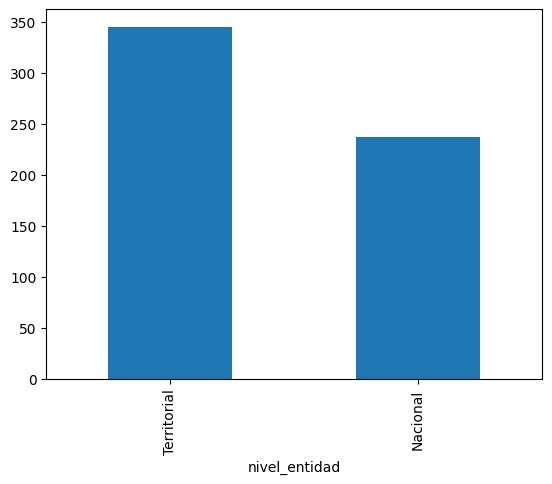

In [ ]:
# Analisis de Nivel entidad

df_obras_filtered.nivel_entidad.value_counts().plot(kind='bar')

<Axes: xlabel='municipio_entidad'>

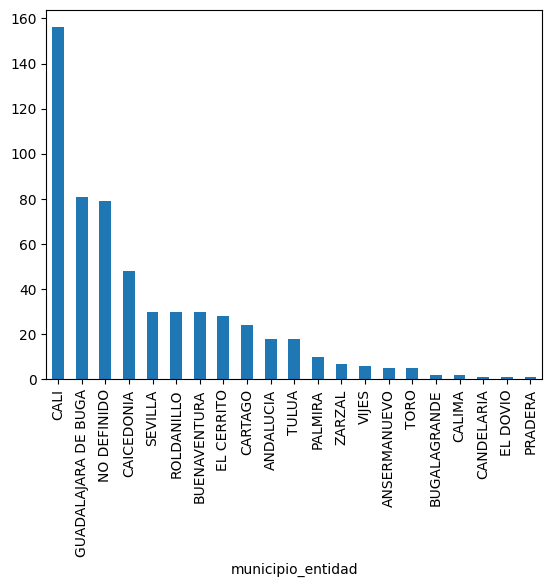

In [ ]:
# Analisis de Municipio entidad

df_obras_filtered.municipio_entidad.value_counts().plot(kind='bar')

<Axes: xlabel='modalidad_de_contrataci_n'>

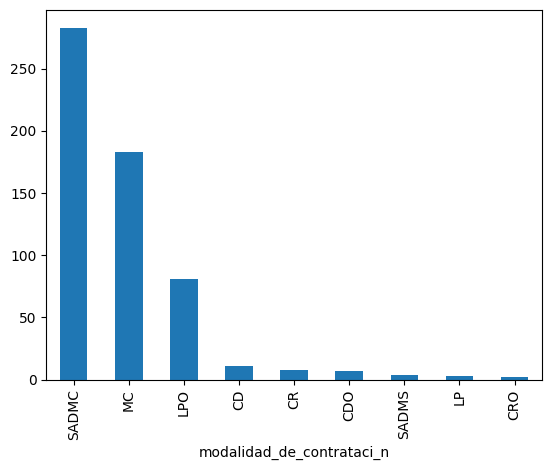

In [ ]:
# Creamos diccionario para la columna "modalidad_de_contrataci_n", para facilitar el analisis

DF_MOD_CONTRAT = {
    "Selección Abreviada de Menor Cuantía":	"SADMC",
    "Mínima cuantía": "MC",
    "Licitación pública Obra Publica":	"LPO",
    "Contratación directa":	"CD",
    "Contratación régimen especial":	"CR",
    "Contratación Directa (con ofertas)":	"CDO",
    "Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes":	"SADMS",
    "Licitación pública":	"LP",
    "Contratación régimen especial (con ofertas)":	"CRO"
}

df_obras_filtered['modalidad_de_contrataci_n'] = df_obras_filtered['modalidad_de_contrataci_n'].replace(DF_MOD_CONTRAT)


df_obras_filtered.modalidad_de_contrataci_n.value_counts().plot(kind='bar')


<Axes: xlabel='valor_categoria'>

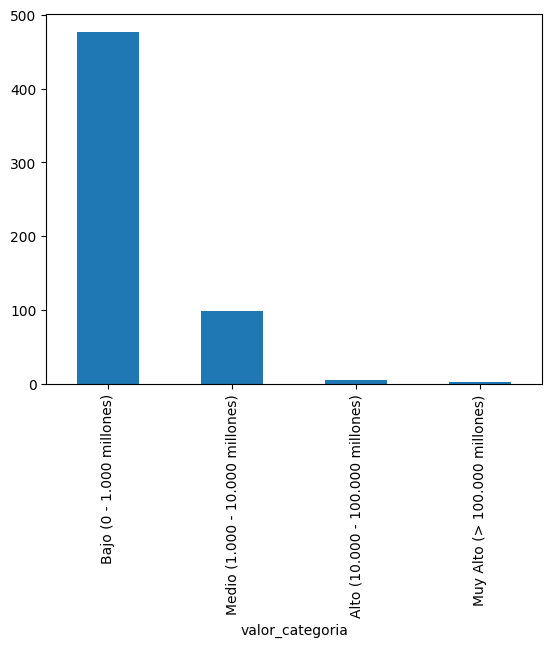

In [ ]:
# Analisis de Valor categoria con dispercion

df_obras_filtered.valor_categoria.value_counts().plot(kind='bar')


<Axes: xlabel='sector'>

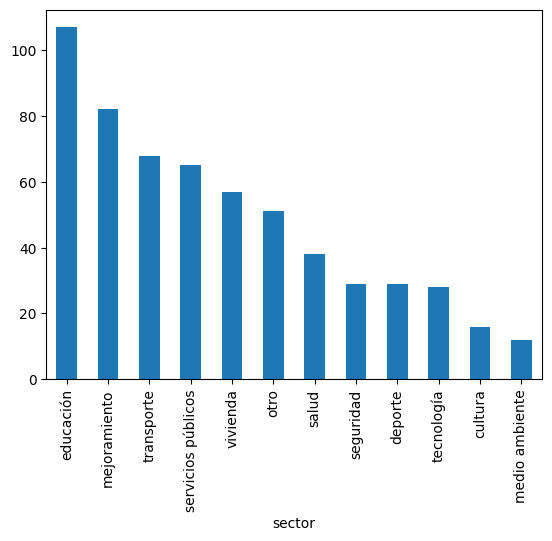

In [ ]:
#Analisis de sector

df_obras_filtered.sector.value_counts().plot(kind='bar')

In [ ]:
# Se desea analizar la variable "valor_contrato", como variables numericas.

df_obras_filtered.valor_contrato.describe()

,valor_contrato
count,5.820000e+02
mean,1.114454e+09
std,7.074766e+09
min,1.398000e+05
25%,5.791269e+07
50%,2.284613e+08
75%,6.773357e+08
max,1.178148e+11


<Axes: xlabel='valor_contrato'>

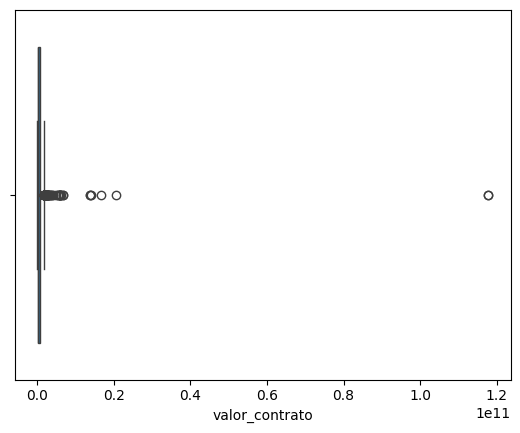

In [ ]:
# Analisis de valor contrato

sns.boxplot(x=df_obras_filtered['valor_contrato'])


In [ ]:
#  Analisis de porcentaje

df_obras_filtered.porcentaje.describe()

,porcentaje
count,582.000000
mean,254.596472
std,4088.695105
min,0.000000
25%,65.146328
50%,100.000000
75%,100.000000
max,98717.879828


<Axes: xlabel='porcentaje'>

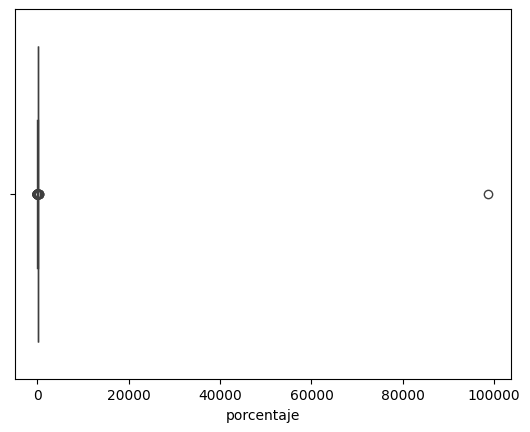

In [ ]:
# analisar outlayers de porcentaje
sns.boxplot(x=df_obras_filtered['porcentaje'])


Se detecta un outlayers, que bajo el creterio de negocio, es un error, y se debe eliminar el registro. esto ayuda a facilitar el analisis y visualizacion.

In [ ]:
df_obras_filtered[df_obras_filtered['porcentaje'] == df_obras_filtered['porcentaje'].max()]

,nivel_entidad,municipio_entidad,modalidad_de_contrataci_n,valor_contrato,valor_categoria,sector,porcentaje,bandera,dias_fin_ejec
535,Territorial,NO DEFINIDO,SADMC,139800,Bajo (0 - 1.000 millones),servicios públicos,98717.879828,1,54


In [ ]:
# se elimina el registro mayor de "porcentaje" porque hay un outlayers de 96000 y ese registro segun el negocio es un error, dado que el valor contrato es de 136 mil pesos.


df_obras_filtered = df_obras_filtered.drop(df_obras_filtered[df_obras_filtered['porcentaje'] == df_obras_filtered['porcentaje'].max()].index)

df_obras_filtered.porcentaje.describe()



,porcentaje
count,581.000000
mean,85.124383
std,43.953835
min,0.000000
25%,65.146328
50%,100.000000
75%,100.000000
max,273.840129


<Axes: xlabel='porcentaje'>

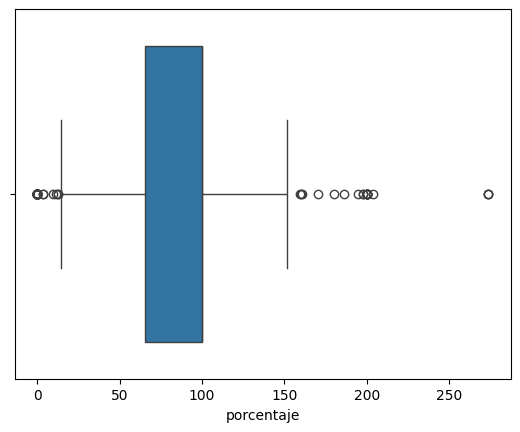

In [ ]:
sns.boxplot(x=df_obras_filtered['porcentaje'])

ANALISIS BIVARIADO

Instrucciones:
Realización del Análisis Bivariado en Python (3 puntos)

Seleccionar dos variables de un conjunto de datos y justificar su elección.
Calcular estadísticas que describan la relación entre las variables (correlación, tablas de contingencia, etc.).
Generar visualizaciones apropiadas, como:
Diagramas de dispersión (para variables numéricas).
Boxplots comparativos (para una variable numérica y una categórica).
Heatmaps de correlación (para múltiples variables numéricas).
Gráficos de barras o stacked charts (para variables categóricas).
Interpretar las tendencias y patrones observados.
Conclusiones (2 puntos)

Resumir los hallazgos clave del análisis.
Explicar el impacto de la relación entre las variables en el contexto del conjunto de datos.
Plantear posibles hipótesis o próximos pasos para un análisis más profundo.
Ejemplo de estructura de entrega:
Selección de las variables y justificación
Código en Python con el análisis bivariado y sus visualizaciones
Interpretación de los resultados
Conclusiones y reflexiones

Se desea analizar los contratos con sobrecostos, que son los que tienen porcentaje mayor a 100.

In [ ]:
# porcentaje mayor a 100 vs municipio

df_porcentaje_mayor_100 = df_obras_filtered[df_obras_filtered['porcentaje'] > 100]

Se analizan la distribucion de sobrecostos por municipio.


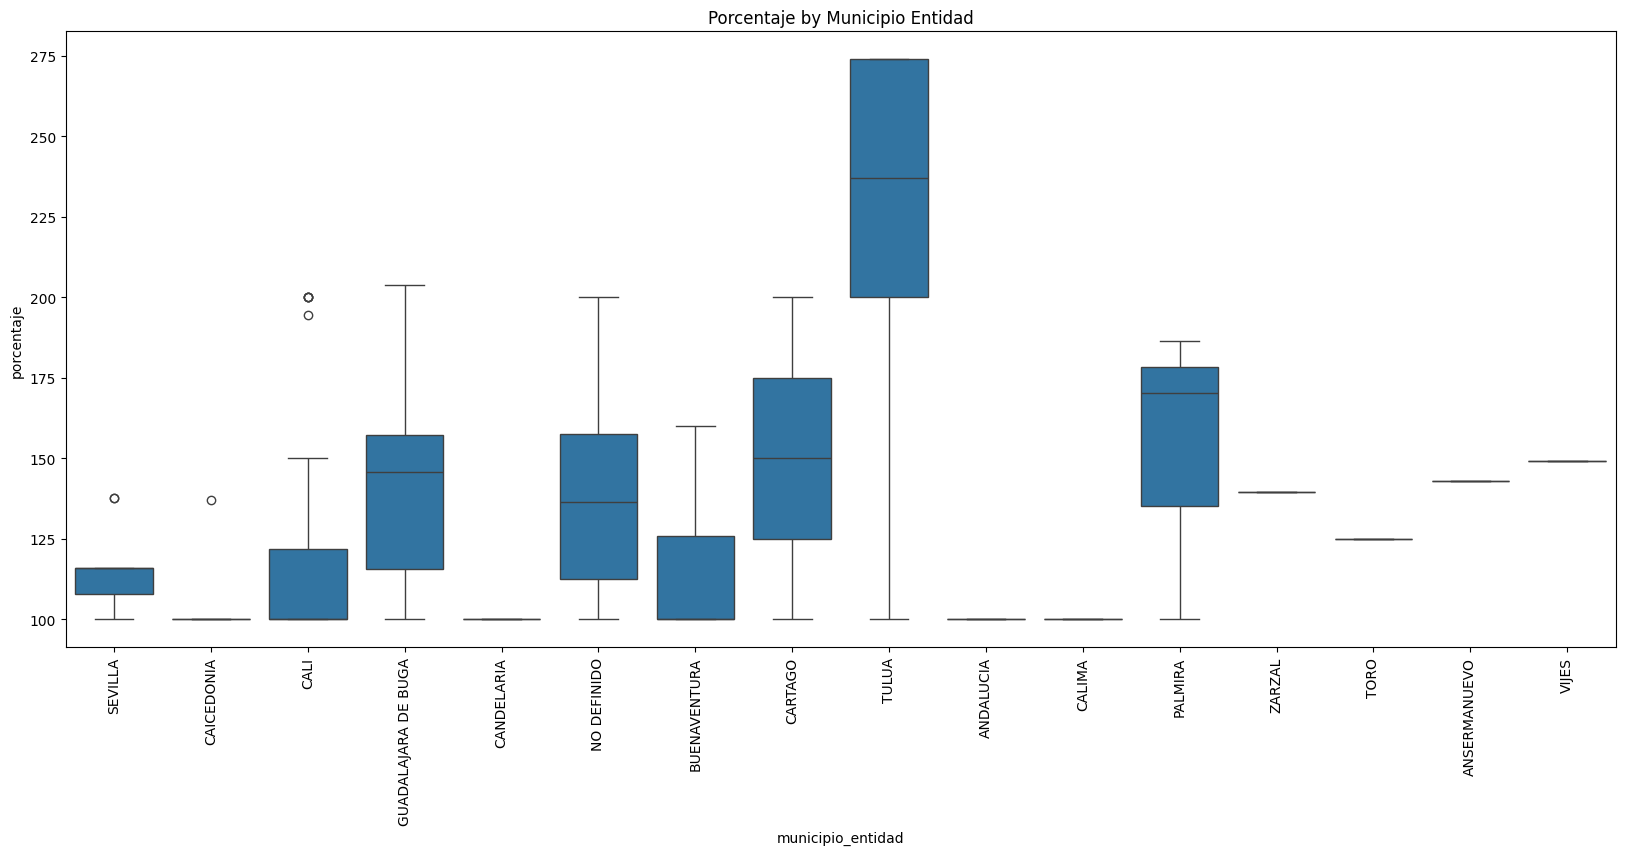

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='municipio_entidad', y='porcentaje', data=df_porcentaje_mayor_100)
plt.xticks(rotation=90)
plt.title('Porcentaje by Municipio Entidad')
plt.show()

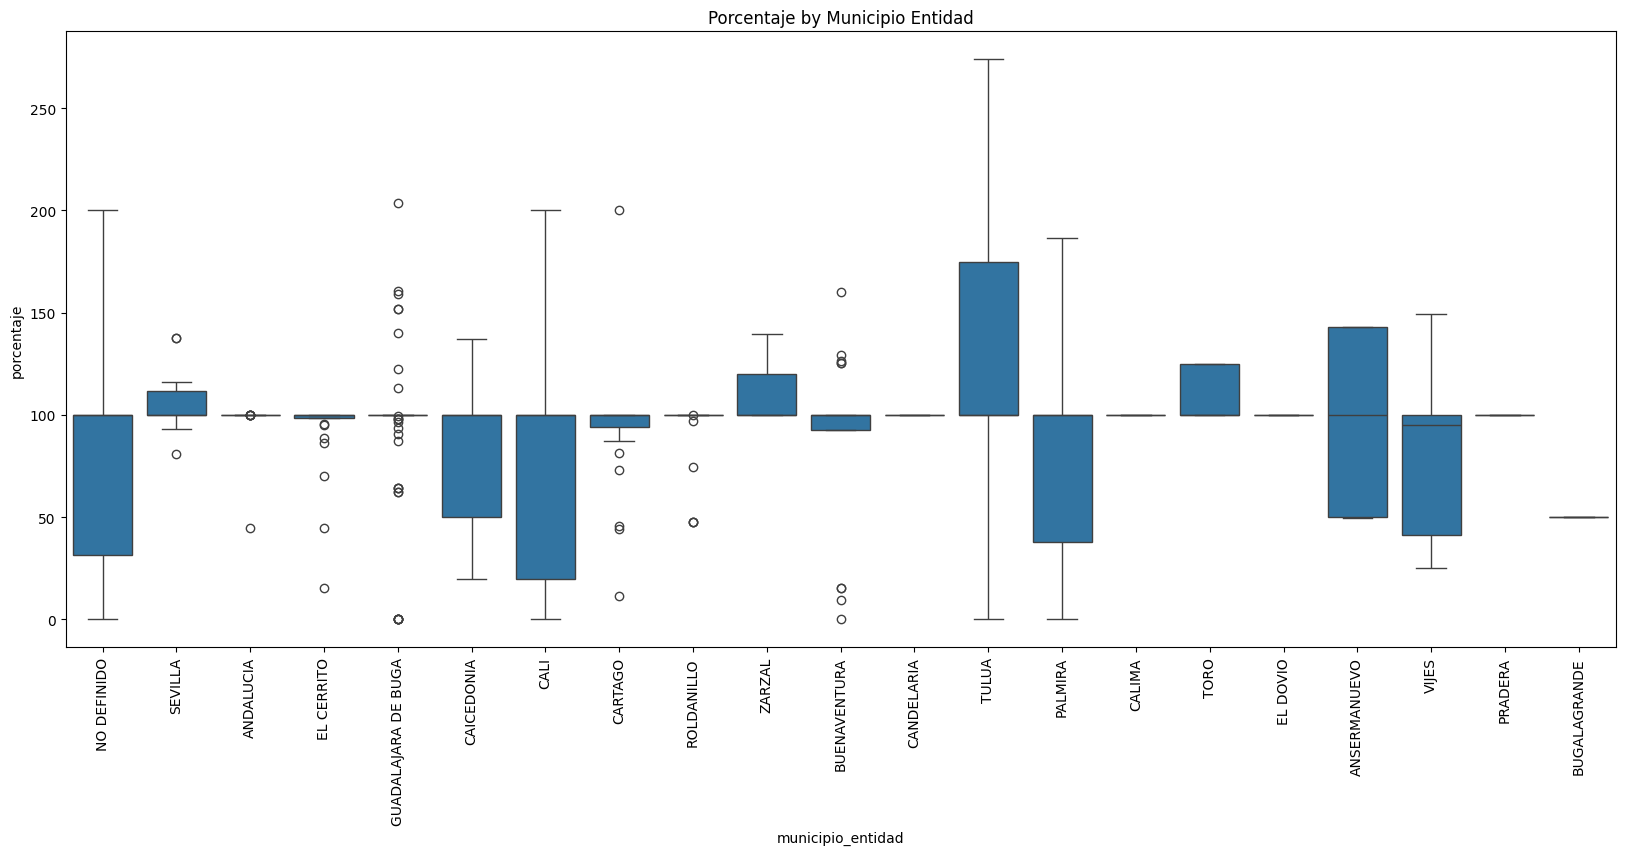

In [ ]:
# Porcentaje vs municipio entidad

plt.figure(figsize=(20, 8))
sns.boxplot(x='municipio_entidad', y='porcentaje', data=df_obras_filtered)
plt.xticks(rotation=90)
plt.title('Porcentaje by Municipio Entidad')
plt.show()

### Conclusion municipio con sobrecostos

Dado que nuestro objetivo es responder la pregunta SMART —predecir los sobrecostos superiores al 30%—, se realizará el análisis de la columna bandera, que indica la presencia de sobrecostos, en relación con el resto de las variables.

<Axes: xlabel='valor_contrato', ylabel='bandera'>

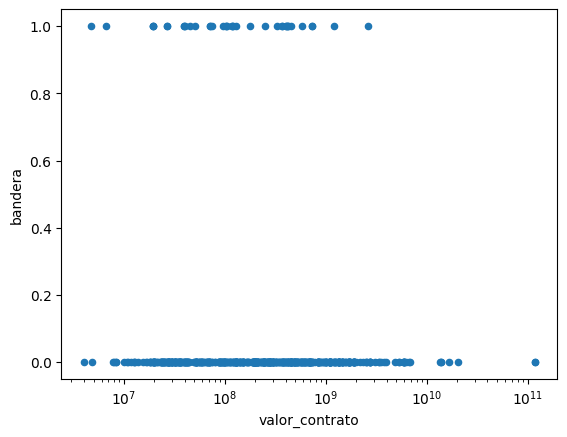

In [ ]:
# Valor contrato vs Bandera.

df_obras_filtered.plot(kind='scatter', x='valor_contrato', y='bandera', logx=True)

*# Esta grafica nos muestra que el valor contrato no tiene relacion, con la bandera de sobrecostos*.

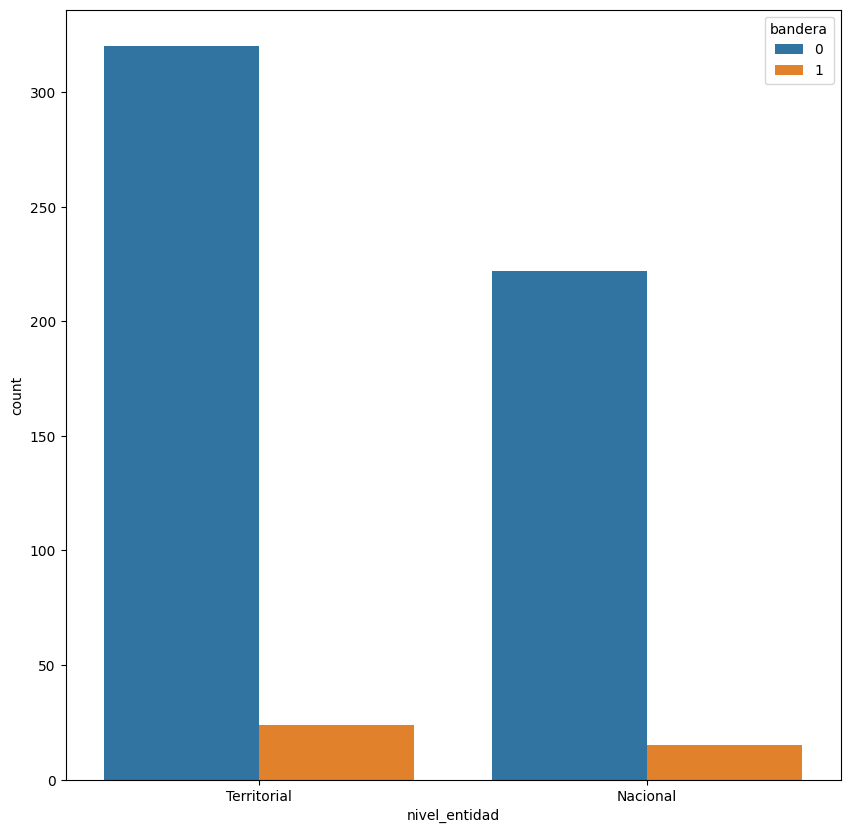

In [ ]:
# nivel_entidad vs bandera

plt.figure(figsize=(10, 10))
sns.countplot(x='nivel_entidad', hue='bandera', data=df_obras_filtered)
plt.show()

*# Esta grafica nos muestra que los sobrecostos estan distribuidos proporcionalmente entre los niveles de entidad*.

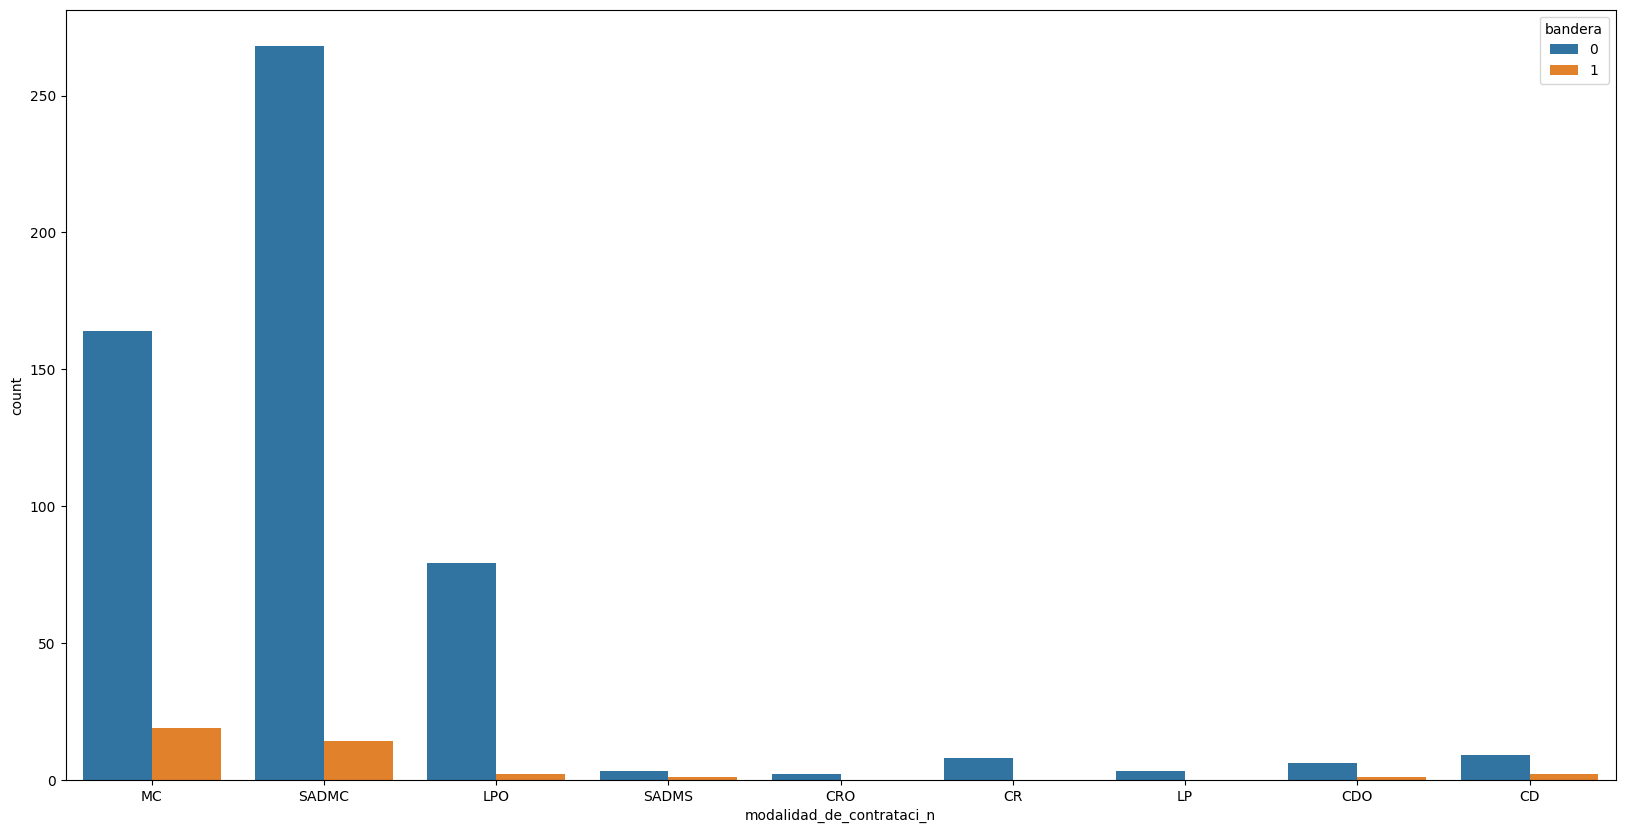

In [ ]:
# modalidad_de_contrataci_n vs bandera
plt.figure(figsize=(20, 10))
sns.countplot(x='modalidad_de_contrataci_n', hue='bandera', data=df_obras_filtered)
plt.show()



*# Esta grafica nos muestra que los sobrecostos estan proporcionalmente presenten en CASI TODAS las modalidades de contratacion*.

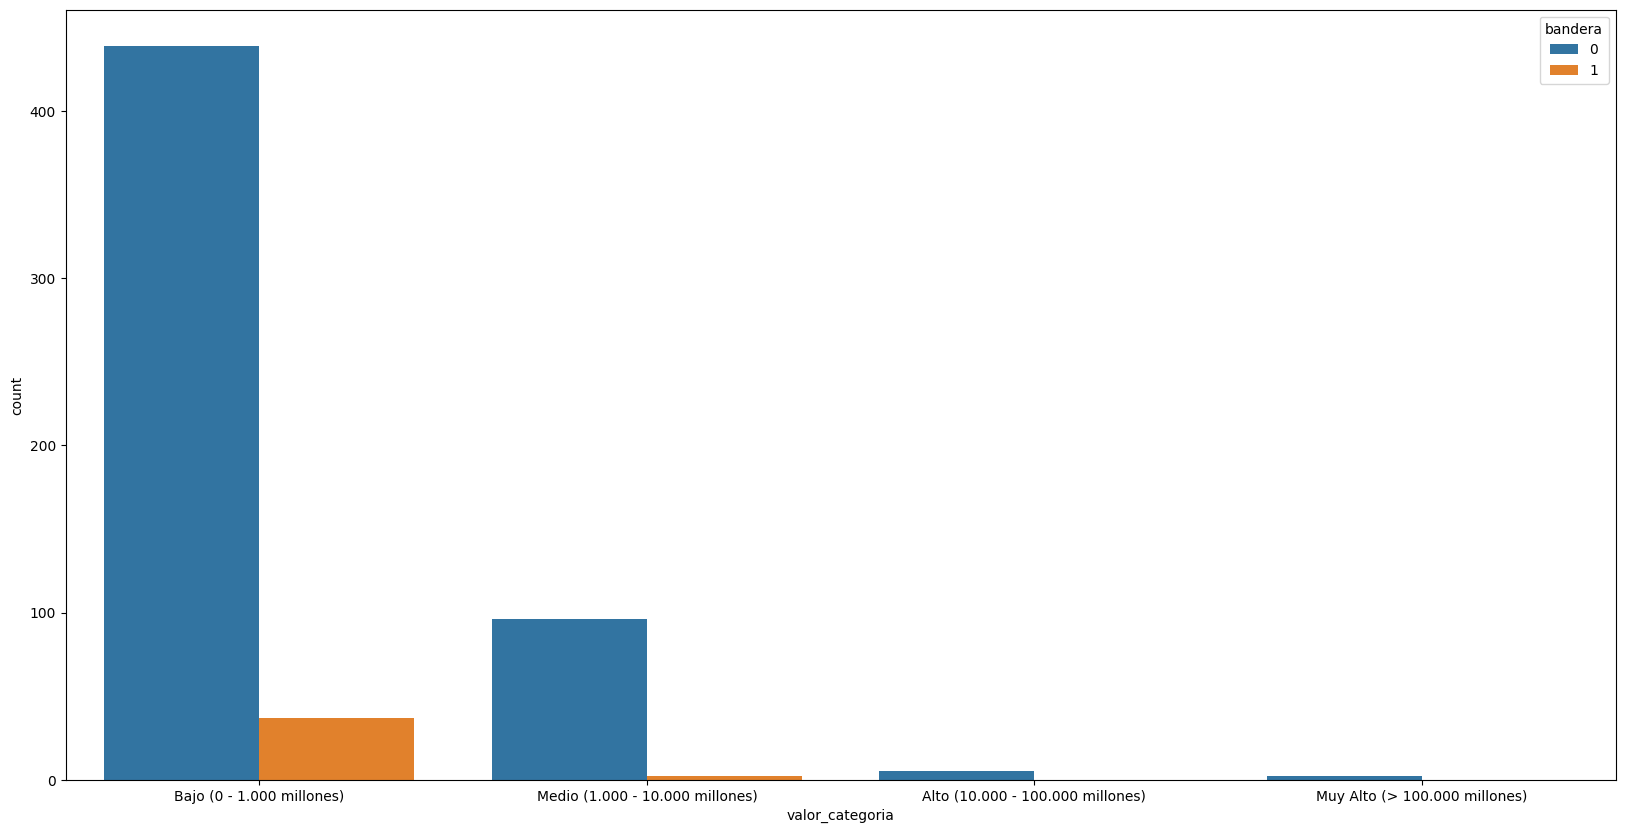

In [ ]:
# valor_categoria vs bandera
plt.figure(figsize=(20, 10))
sns.countplot(x='valor_categoria', hue='bandera', data=df_obras_filtered)
plt.show()



*# Esta grafica nos muestra que los sobrecostos estan distribuidos en casi todas las categorias de valor*.

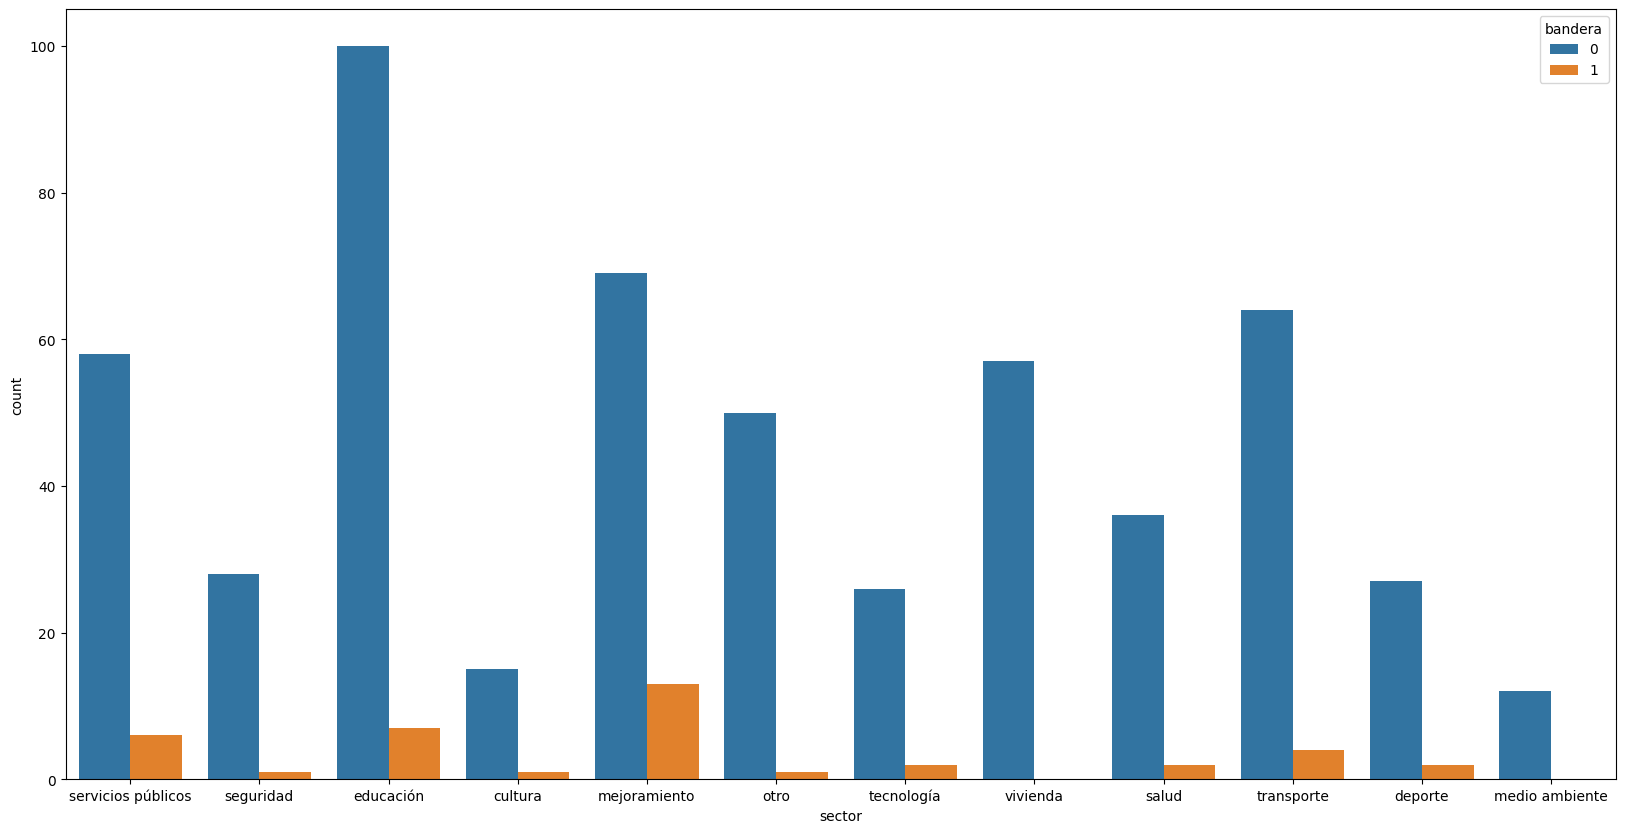

In [ ]:
# sector vs bandera con barras apiladas

plt.figure(figsize=(20, 10))
sns.countplot(x='sector', hue='bandera', data=df_obras_filtered)
plt.show()

*# Esta grafica nos muestra sobrecostos en la mayoria de sectores, y la presencia relevante en MEJORAMIENTO*.

<Axes: xlabel='valor_contrato', ylabel='dias_fin_ejec'>

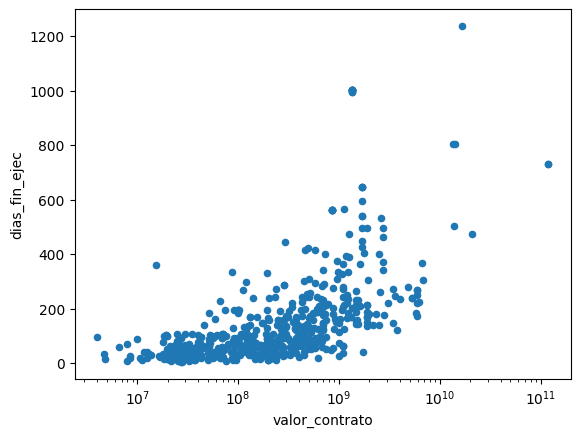

In [ ]:
# valor contrato vs dias_fin_ejec

df_obras_filtered.plot(kind='scatter', x='valor_contrato', y='dias_fin_ejec', logx=True)


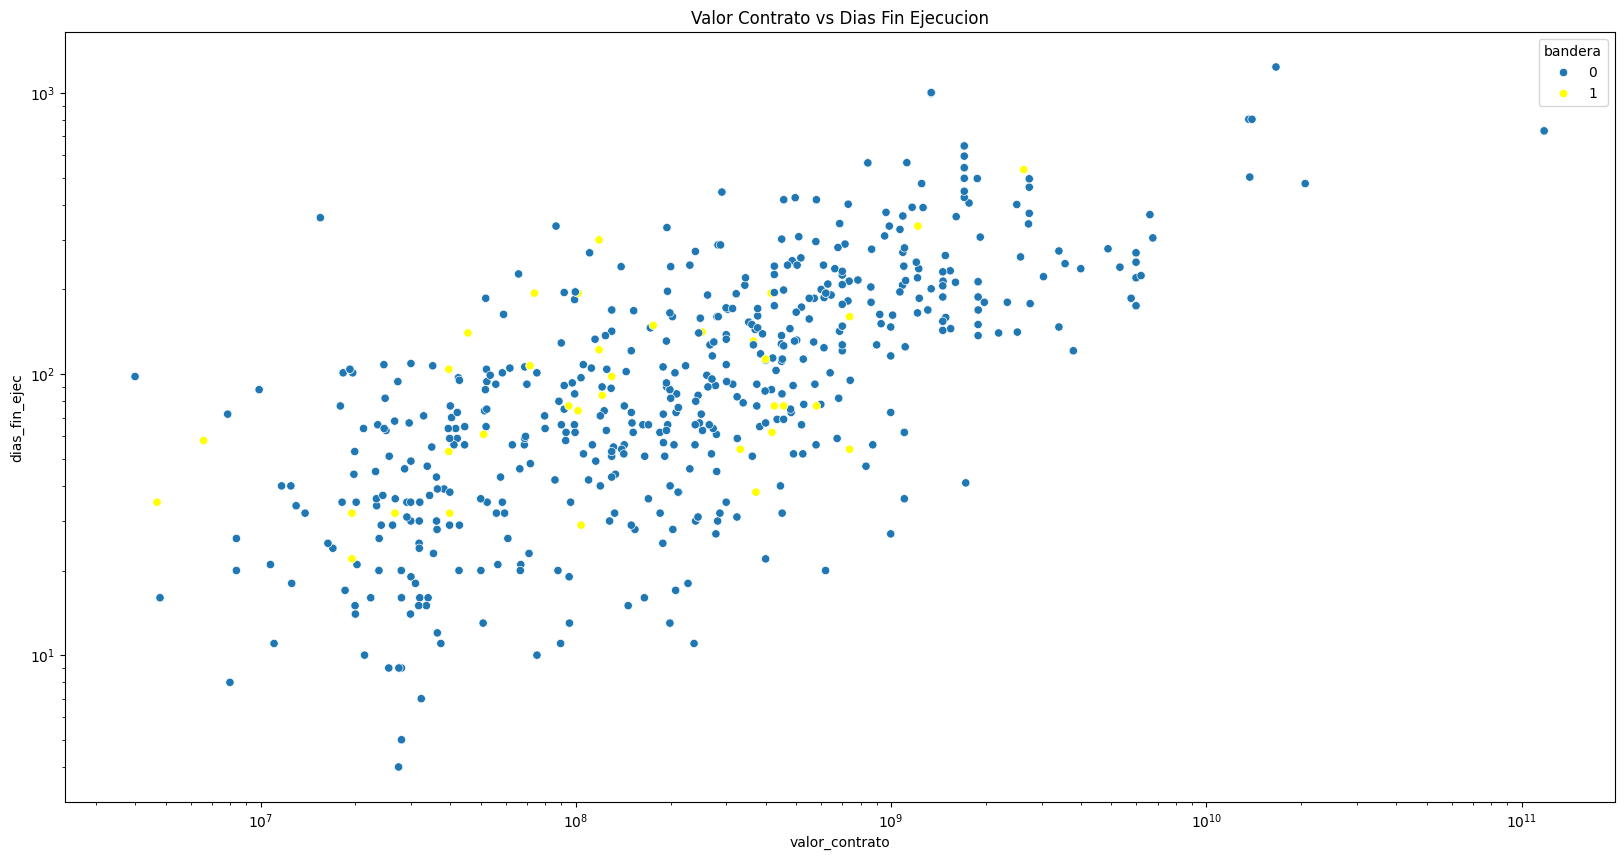

In [ ]:
# valor contrato vs dias_fin_ejec

plt.figure(figsize=(20, 10))
sns.scatterplot(x='valor_contrato', y='dias_fin_ejec', hue='bandera', data=df_obras_filtered, palette={0: 'tab:blue', 1: 'yellow'})
plt.xscale('log')
plt.yscale('log')
plt.title('Valor Contrato vs Dias Fin Ejecucion')
plt.show()

<Axes: >

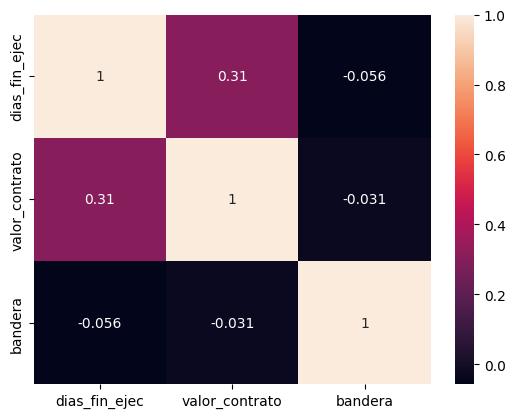

In [ ]:
# correlacion entre dias_fin_ejec vs valor_contrato vs bandera

corr = df_obras_filtered[['dias_fin_ejec', 'valor_contrato', 'bandera']].corr()
sns.heatmap(corr, annot=True)


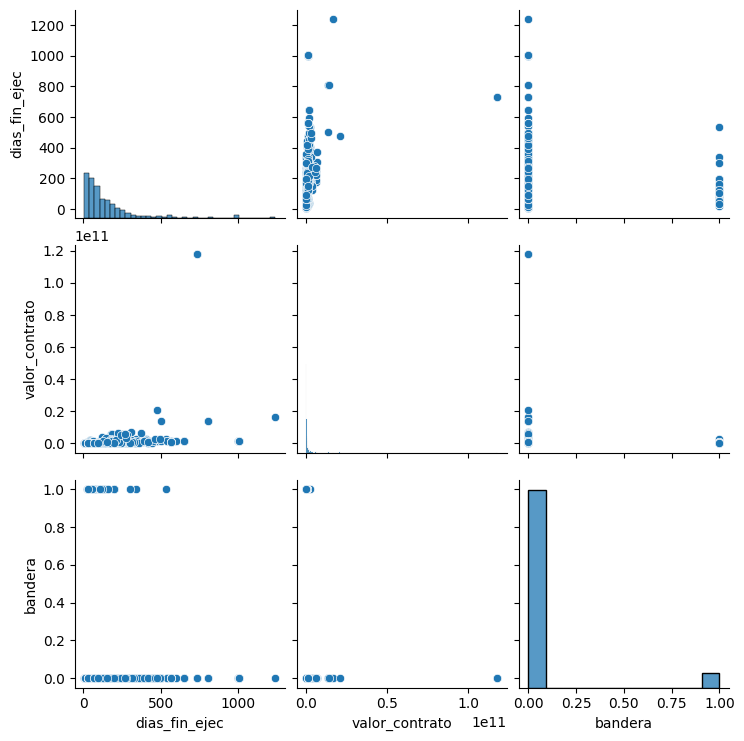

In [ ]:
sns.pairplot(df_obras_filtered[['dias_fin_ejec', 'valor_contrato', 'bandera']])

*# Esta grafica evidencia una LEVE relacion entre las variables valor de contrato y dias fin ejecucion*.

<Figure size 2000x1000 with 0 Axes>

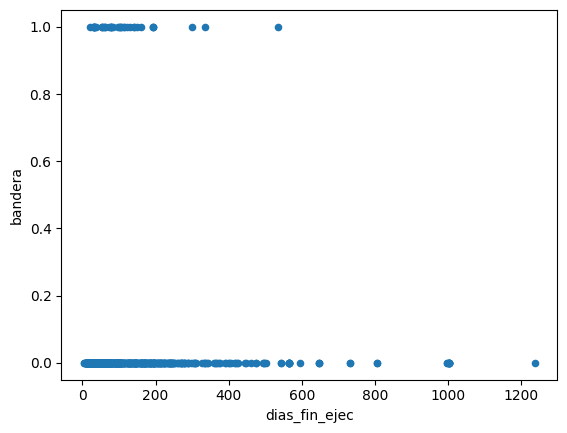

In [ ]:
# dias_fin_ejec vs bandera

plt.figure(figsize=(20, 10))
df_obras_filtered.plot(kind='scatter', x='dias_fin_ejec', y='bandera')
plt.show()

*# Esta grafica nos muestra que no existe relacion entre la bandera de sobrecostos y los dias fin ejecucion*.

### Se analiza en detalle los hallazgos, del analisis, por ejemplo el porcentaje de sobrecostos en el municipio de ANSERMANUEVO

<Axes: xlabel='bandera', ylabel='count'>

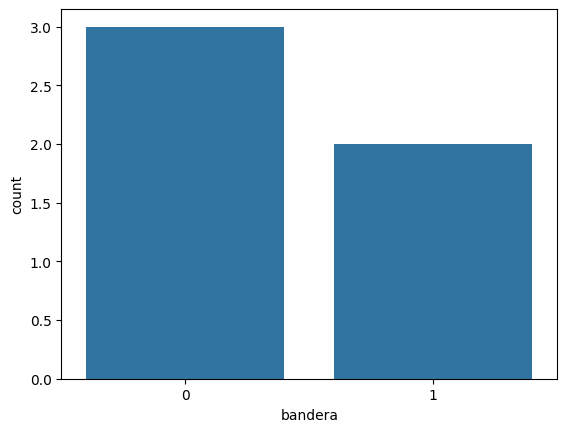

In [ ]:
df_obras_filtered[df_obras_filtered['municipio_entidad'] == 'ANSERMANUEVO'].groupby('bandera').valor_contrato.value_counts()


sns.countplot(x='bandera', data=df_obras_filtered[df_obras_filtered['municipio_entidad'] == 'ANSERMANUEVO'])

### El análisis anterior constituye un hallazgo muy relevante para la vigilancia gubernamental; sin embargo, debido al bajo número de datos disponibles en el municipio, no es posible establecer conclusiones definitivas.

# **CONCLUSIONES**

## 1. La cantidad de información disponible resulta limitada para realizar un análisis sólido.

## 2. La columna valor_contrato no muestra relación con la bandera de sobrecostos.

## 3. La columna dias_fin_ejec tampoco presenta relación con la bandera de sobrecostos.

## 4. La distribución de los sobrecostos aparece relativamente uniforme a lo largo de los distintos rangos y categorías de las variables consideradas como posibles predictoras.

## 5. Es necesario complementar el dataset con otras fuentes de información, ya que actualmente contiene pocas variables numéricas para un análisis predictivo robusto.
